Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:


. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? gropuby education /salary, sacar mean 
. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? pieplot loyaltycard
. ¿Cómo se distribuyen los clientes según su estado civil y género? countplot /gender, marital status

#barplot promedio, estadística / countplot: var.categórica value_counts
Dsitance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado
durante el mes

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("files/df_union.csv")
df.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Cancelado
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,0,0,False
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,66872.73,Single,Nova,2887.74,Standard,2013,3,0,0,False
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,66872.73,Divorced,Nova,2838.07,Standard,2016,7,0,0,False
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8,0,0,False
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1,0,0,False


C:\Users\paula\AppData\Local\Temp\ipykernel_11864\523337408.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vuelos_mes, x='Month', y='Flights Booked', palette='magma')


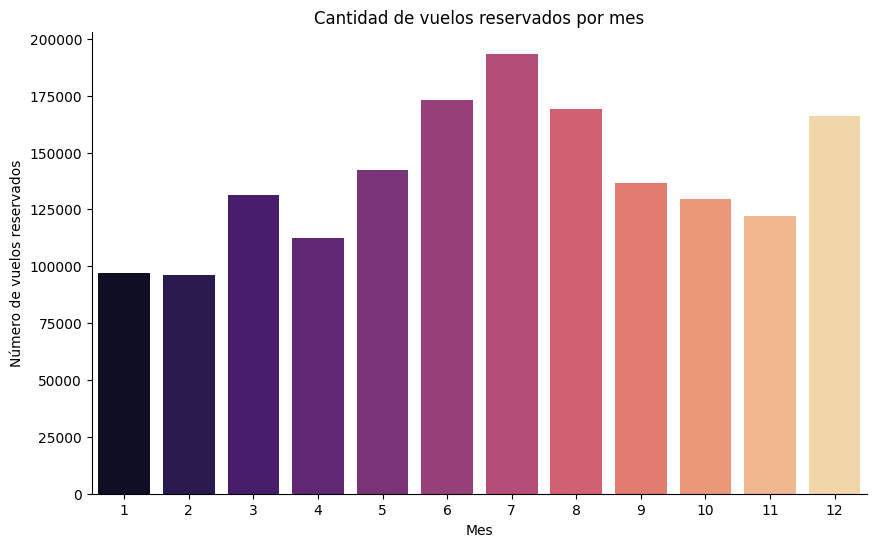

In [20]:
#¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? 
# primero agrupamos los vuelos sumados por mes, utilizamos barplot para ver la cantidad de vuelos por mes
#Observamos que el mes con mayor cantidad de vuelos reservados por año es el séptimo, correspondiente a Julio. 
# Aunque se encuentra sobretodo distribuidos entre las estaciones de verano, desde mayo a agosto, y Diciembre, correspondiendo con vacaciones.
#Conclusión, pese a la estacionalidad, se siguen reservando bastantes vuelos a lo largo del año, se podrían hacer medidas para potenciar la reserva de vuelos en los meses más bajos.
vuelos_mes = df.groupby('Month')['Flights Booked'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=vuelos_mes, x='Month', y='Flights Booked', palette='magma')
plt.xlabel('Mes')
plt.ylabel('Número de vuelos reservados')
plt.title('Cantidad de vuelos reservados por mes')
sns.despine(top=True, right=True)


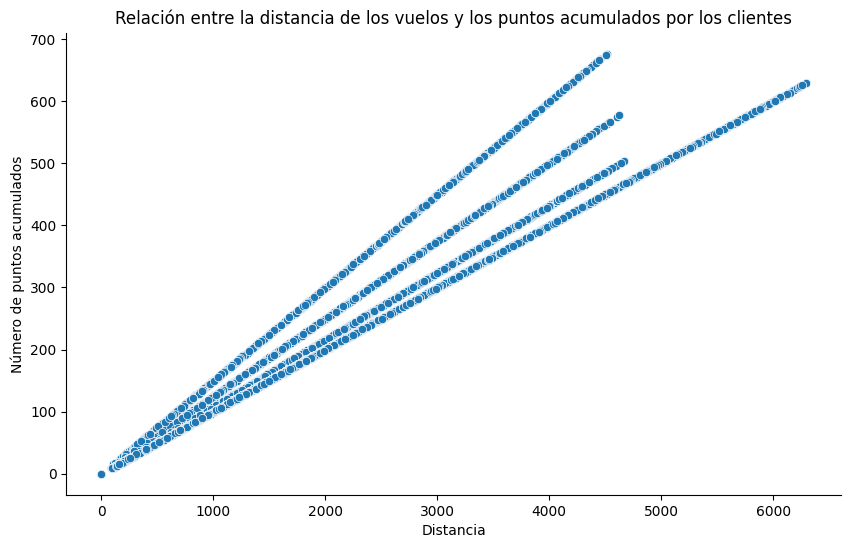

In [ ]:
#. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente? 
# relacion:scatterplot/ distance y points accumulated
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x='Distance', y='Points Accumulated')
plt.xlabel('Distancia')
plt.ylabel('Número de puntos acumulados')
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados por los clientes')
sns.despine(top=True, right=True)

#Hay muchos valores con 0 puntos, que corresponden a 0 puntos acumulados, pueden ser vuelos no realizados o vuelos que no cuenten con un programa de acumulación de puntos.
# Es posible que existen reglas de puntuaje según una distancia fija, lo que genera esta agrupación en 4 líneas ascendentes.
#Pese a esta claro agrupación, podemos ver una tendencia clara positiva, cuanta más distancia, más puntos acumulados. Los vuelos largos, tendrán mayor puntuaje.


C:\Users\paula\AppData\Local\Temp\ipykernel_11864\1993378409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Province', order= df['Province'].value_counts().index, palette='magma') #lista de provincias/estado ordenada por conteo


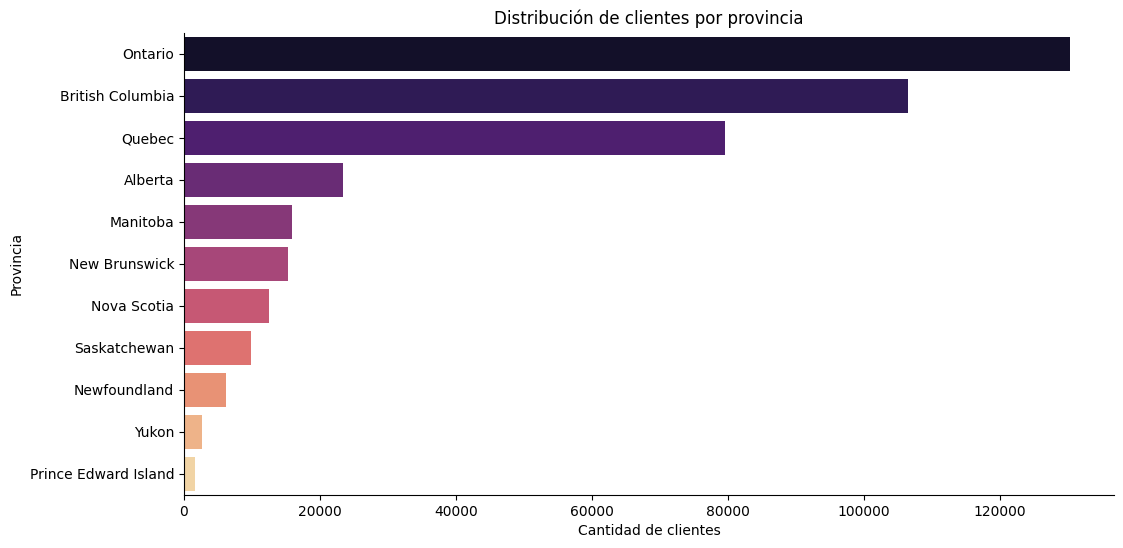

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Province', order= df['Province'].value_counts().index, palette='magma') #lista de provincias/estado ordenada por conteo
plt.title('Distribución de clientes por provincia')
plt.ylabel('Provincia')
plt.xlabel('Cantidad de clientes')
sns.despine(top=True, right=True)
#La provincia que más clientes tiene es Ontario, seguida de British Columbia y Quebec.

C:\Users\paula\AppData\Local\Temp\ipykernel_11864\2340289475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salario_educacion, y='Education', x='Salary',palette='magma')


Text(0, 0.5, 'Nivel educativo')

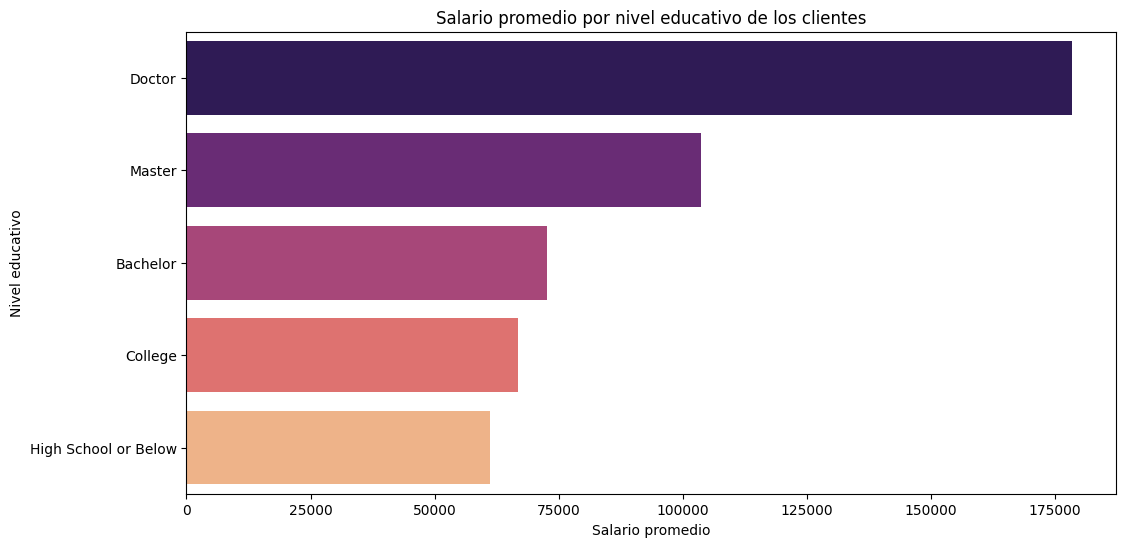

In [ ]:
#. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? 
# gropuby education /salary, sacar mean 
plt.figure(figsize=(12,6))
salario_educacion = df.groupby('Education')['Salary'].mean().reset_index()
salario_educacion = salario_educacion.sort_values(by='Salary', ascending=False)

sns.barplot(data=salario_educacion, y='Education', x='Salary',palette='magma')
plt.title('Salario promedio por nivel educativo de los clientes')
plt.xlabel('Salario promedio')
plt.ylabel('Nivel educativo')
sns.despine(top=True, right=True)
#Respecto a este gráfico podemos comprobar que el nivel education tiene una relación directa con el sueldo promedio de los clientes.
#De esta manera, sabemos que el orden es el siguiente, de lo más bajo a lo más alto: High School or Below, College, Bachelor, Master, Doctor.
#Respecto a los datos obtenidos, hayq ue remarcar que el salario promedio de los clientes que han estudiado hasta College, ha sido obtenido
# haciendo una media entre High School y Bachelor ya que no disponíamos de esos datos, pero sí que nos ayuda a entender que efectivamente,
#cuantos más estudios tienes, mayor salario promedio obtienes.

Text(0.5, 1.0, 'Proporción de clientes por tipo de tarjeta de fidelidad')

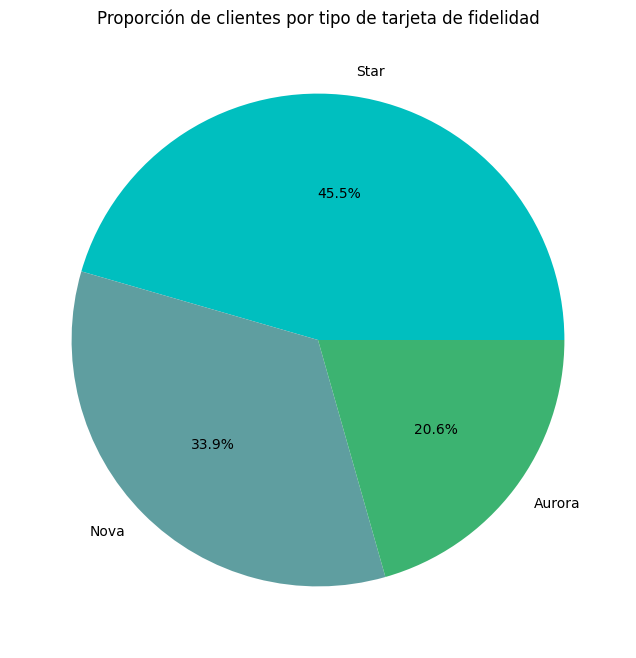

In [37]:
#¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? pieplot loyaltycard

tarjeta_fidelidad = df['Loyalty Card'].value_counts()
colores = ["c", "cadetblue", "mediumseagreen"]
plt.figure(figsize=(8,8))
plt.pie(tarjeta_fidelidad, 
        labels=tarjeta_fidelidad.index, 
        autopct='%1.1f%%', 
        textprops={'fontsize': 10}, 
        colors=colores)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')



np.int64(0)

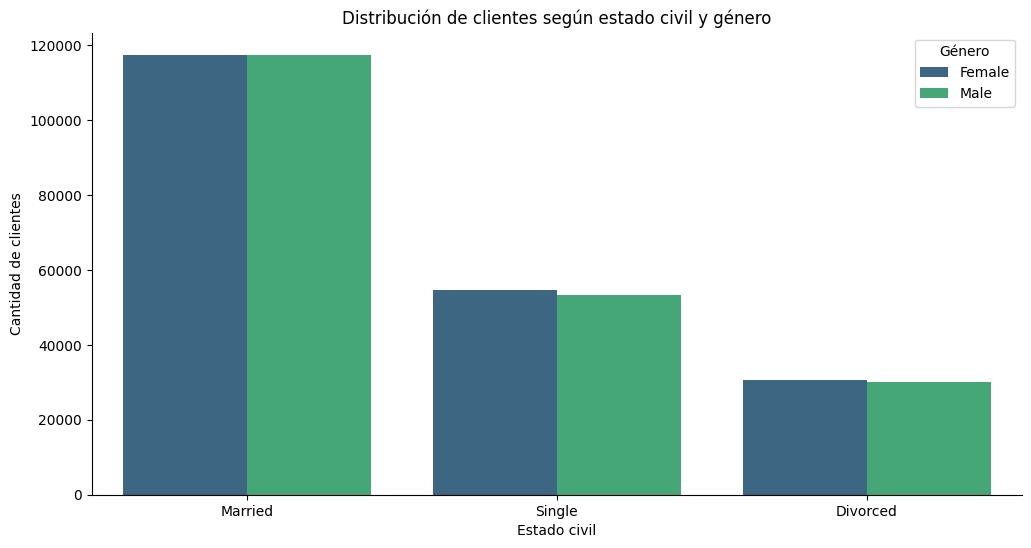

In [35]:
#¿Cómo se distribuyen los clientes según su estado civil y género? countplot /gender, marital status

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Marital Status', hue= 'Gender', palette= 'viridis')
plt.title('Distribución de clientes según estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Género')
sns.despine(top=True, right=True)